In [ ]:
# default_exp core

# nb_dev

> API details.

In [ ]:
from nb_dev.core import *

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
#  File: clustering_mef.ipynb
#  Project: 'OTUS.ADV Homework #3'
#  Created by Gennady Matveev (gm@og.ly) on 14-02-2022.

![TS Clustering](https://docs.google.com/uc?export=download&id=1kP52pViswEsaHNrJUuCUxwXng4oBY3Cu)

**Markowitz Efficient Frontier**  
Trying to beat 5 largest cryptocurrencies with clustering approach  
This notebook complements the main study in time series clustering - otus_adv_hw3_dtw.ipynb.

Open this notebook on mybinder.org

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/oort77/OTUS_ADV_HW3/main)  

![slice1](https://drive.google.com/uc?export=download&id=15ss2sr9Ecl7nNaeSMo7fI7Gkio713cZQ)

In [ ]:
## Import libraries
import pandas as pd
import numpy as np
import pickle
import warnings
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
from jupyterthemes import jtplot 

In [ ]:
### Miscellaneius settings 
get_ipython().run_line_magic('matplotlib', 'inline')
jtplot.style() 
get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'retina'")
# plt.style.use('ggplot')
np.random.seed(27182)
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10, 5)
pd.options.display.precision = 4
display(HTML("<style>.container { width:80% !important; }</style>"))

![slice2](https://drive.google.com/uc?export=download&id=1Bapr76q9lODV4LnZ3WEbHH_TO0_udMaC)

### Portfolio 1: BTC, ETH, XRP, USDT, BNB   
Top 5 CCs by market cap

In [ ]:
p1_list = ["BTC", "ETH", "XRP", "USDT", "BNB"]

### Portfolio 2: SOL, LUNA, USDC, ADA, DOGE  
SOL and LUNA come from BTC cluster 0 with 33 coins,  
USDC, ADA and DOGE - from cluster 1 with 54 coins

In [ ]:
p2_list = ["SOL", "LUNA", "USDC", "ADA", "DOGE"]

In [ ]:
pl = {1: p1_list, 2: p2_list}

![slice3](https://drive.google.com/uc?export=download&id=1Xvrbtz-xHvvk2Tmxtx0B3j-PP2GEjuOD) 

### Load  clustered data

In [ ]:
with open("./data/data_day.pickle", "rb") as f:
    clustered_data = pickle.load(f)
p = {}
p[1] = clustered_data[p1_list]
p[2] = clustered_data[p2_list]

In [ ]:
p[1].head()

,BTC,ETH,XRP,USDT,BNB
0,43088.74,3328.63,0.7796,1.000,494.66
1,43100.36,3349.61,0.7785,1.001,498.67
2,42224.38,3210.90,0.7623,1.001,475.45
3,42372.75,3161.50,0.7517,1.001,471.43
4,41674.80,3084.78,0.7382,1.000,462.11


Check correct imports

In [ ]:
assert p[1].shape[1] == 5

In [ ]:
p[1].head()

,BTC,ETH,XRP,USDT,BNB
0,43088.74,3328.63,0.7796,1.000,494.66
1,43100.36,3349.61,0.7785,1.001,498.67
2,42224.38,3210.90,0.7623,1.001,475.45
3,42372.75,3161.50,0.7517,1.001,471.43
4,41674.80,3084.78,0.7382,1.000,462.11


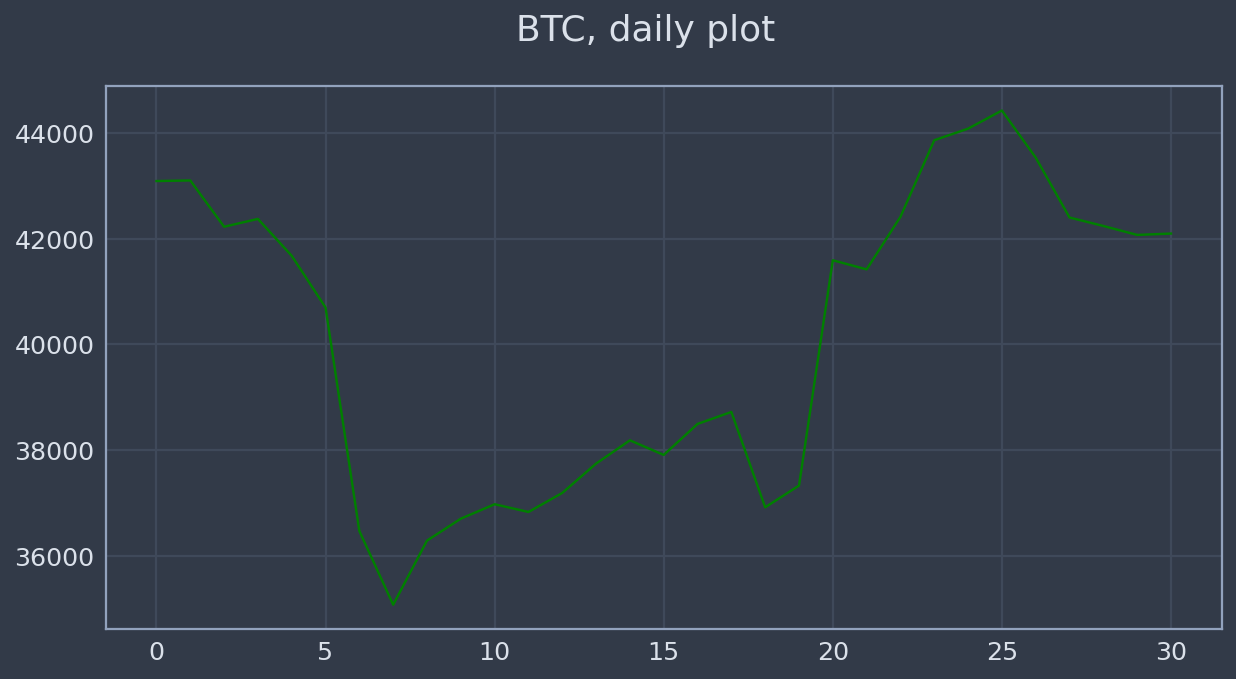

In [ ]:
_,_=plt.subplots(figsize=(10,5))
plt.plot(p[1]["BTC"], color="green")
plt.suptitle("BTC, daily plot", fontsize=18)
# plt.rcParams["font.family"] = "serif" 
plt.show()

In [ ]:
p[2].head()

,SOL,LUNA,USDC,ADA,DOGE
0,147.74,87.30,0.9996,1.292,0.1846
1,147.96,87.11,1.0000,1.412,0.1767
2,139.84,77.13,1.0000,1.603,0.1710
3,141.29,80.77,1.0000,1.459,0.1651
4,135.30,81.20,1.0000,1.337,0.1616


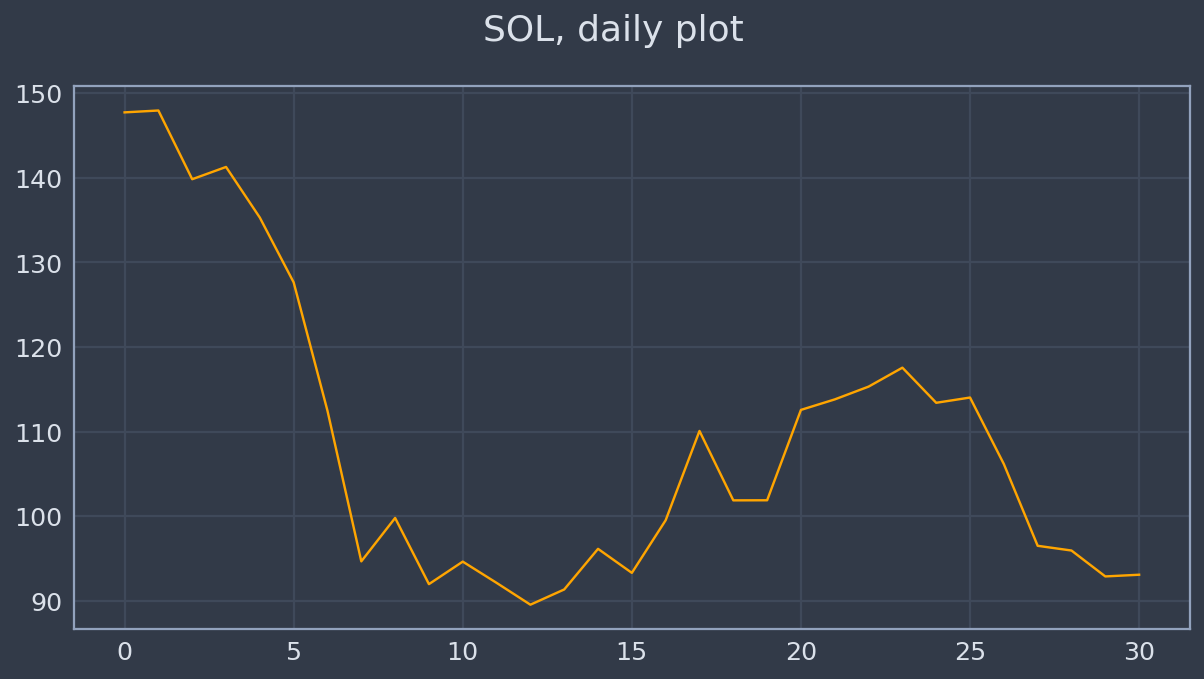

In [ ]:
_,_=plt.subplots(figsize=(10,5))
plt.plot(p[2]["SOL"], color="orange")
plt.suptitle("SOL, daily plot", fontsize=18)
plt.show()

![slice4](https://drive.google.com/uc?export=download&id=1qFbd7HLrG88o7RbgexFUygDR2LP82O7-)

In [ ]:
# export
### Main function
def sharpe(portfolio):
    data = p[portfolio]
    returns = data/data.shift(1)
    logReturns = np.log(returns)

    noOfPortfolios = 20000

    weight = np.zeros((noOfPortfolios, 5))
    expectedReturn = np.zeros(noOfPortfolios)
    expectedVolatility = np.zeros(noOfPortfolios)
    sharpeRatio = np.zeros(noOfPortfolios)

    meanLogRet = logReturns.mean()
    sigma = logReturns.cov()
    for k in range(noOfPortfolios):
        # Generate random weight vector
        w = np.array(np.random.random(5))
        w = w / np.sum(w)
        weight[k,:] = w
        # Expected log return
        expectedReturn[k] = np.sum(meanLogRet * w)
        # Expected volatility
        expectedVolatility[k] = np.sqrt(np.dot(w.T,np.dot(sigma,w)))
        # Sharpe Ratio
        sharpeRatio[k] = expectedReturn[k]/expectedVolatility[k]
    maxIndex = sharpeRatio.argmax()
    plt.figure(figsize=(16,8))
    plt.scatter(expectedVolatility, expectedReturn, c=sharpeRatio)
    plt.xlabel( 'Expected Volatility')
    plt.ylabel( 'Expected Log Returns')
    plt.suptitle(f'Markowitz Efficient Frontier\nPortfolio {portfolio}', fontsize=18)
    plt.colorbar(label='Sharpe Ratio')
    plt.scatter(expectedVolatility[maxIndex], expectedReturn[maxIndex], c='red')
    plt.show()
    return weight[maxIndex,:]

![slice5](https://drive.google.com/uc?export=download&id=1tO_u4a_RioPUolVviZLhJrriXe7kZ3XO) 

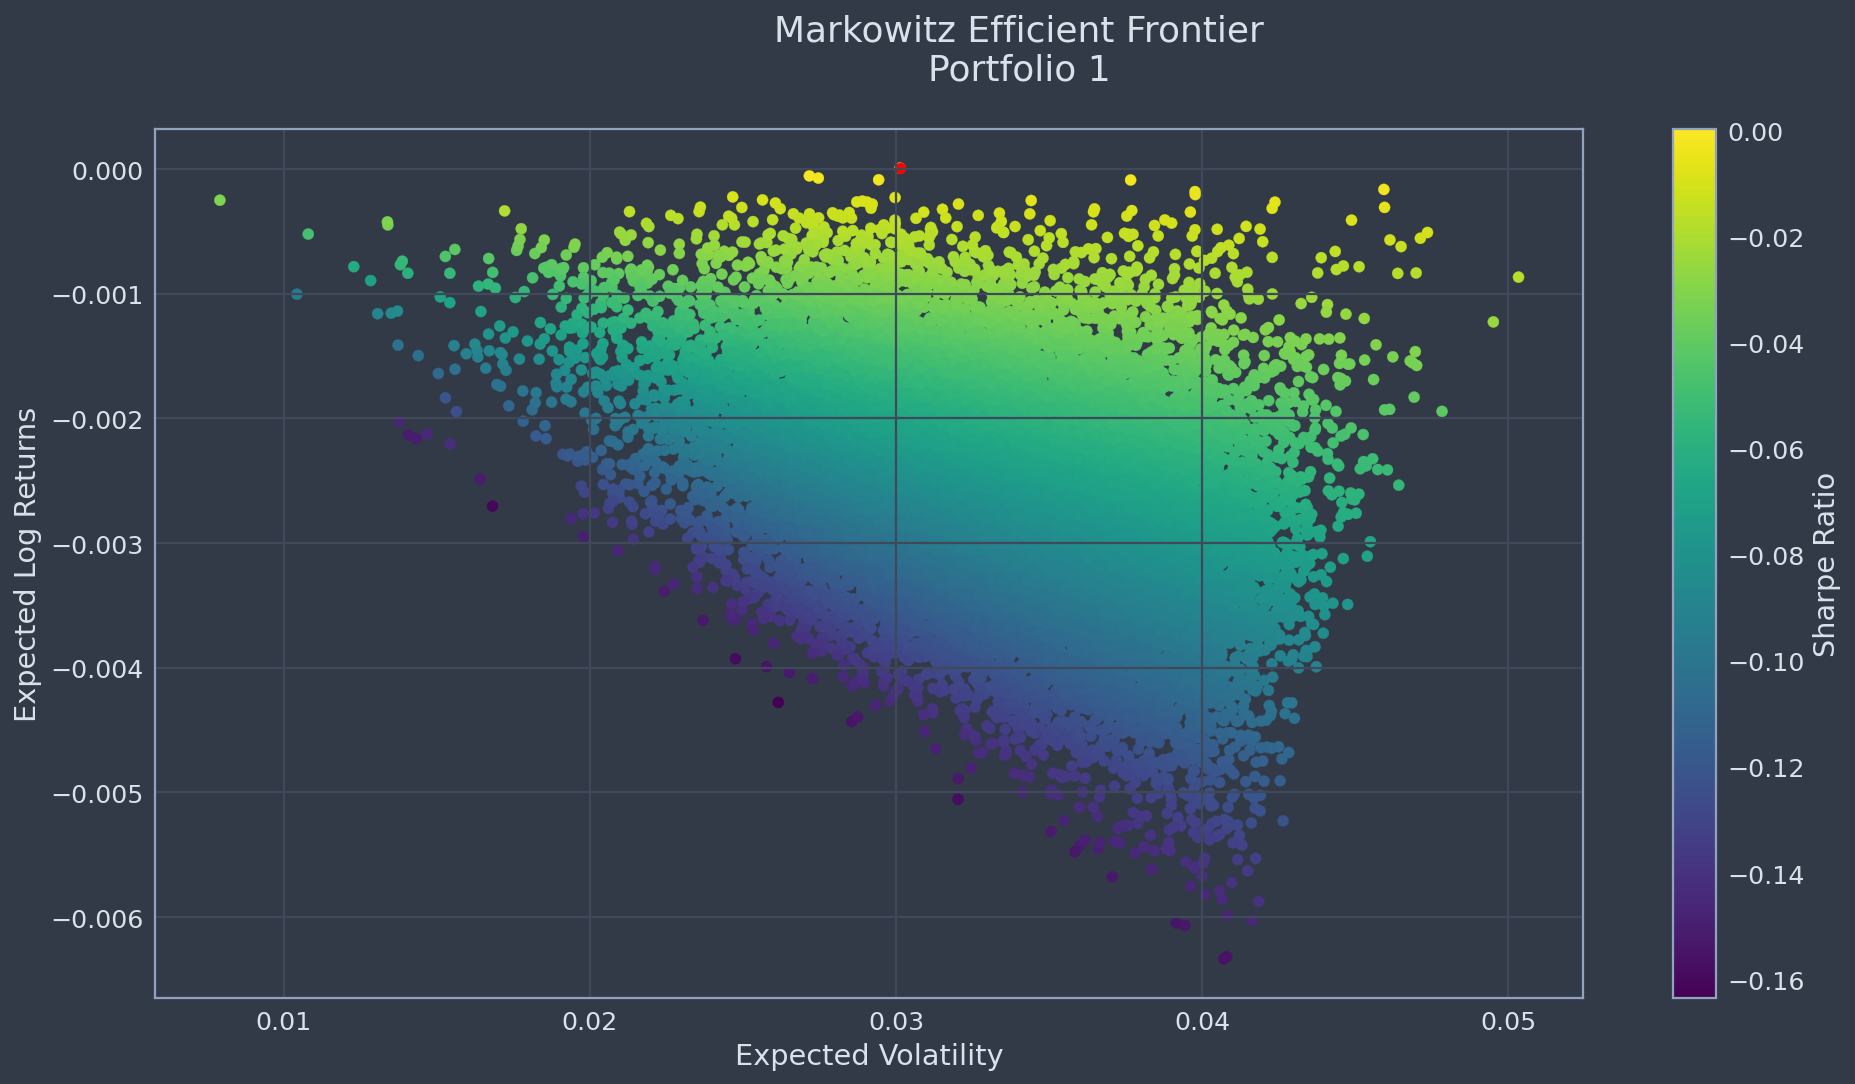

In [ ]:
### Portfolio 1 optimization
weights = {}
weights[1] = sharpe(1)

![slice6](https://drive.google.com/uc?export=download&id=1updrFKIPTzfVguR8_FQ8kTklpbvIrDqo)

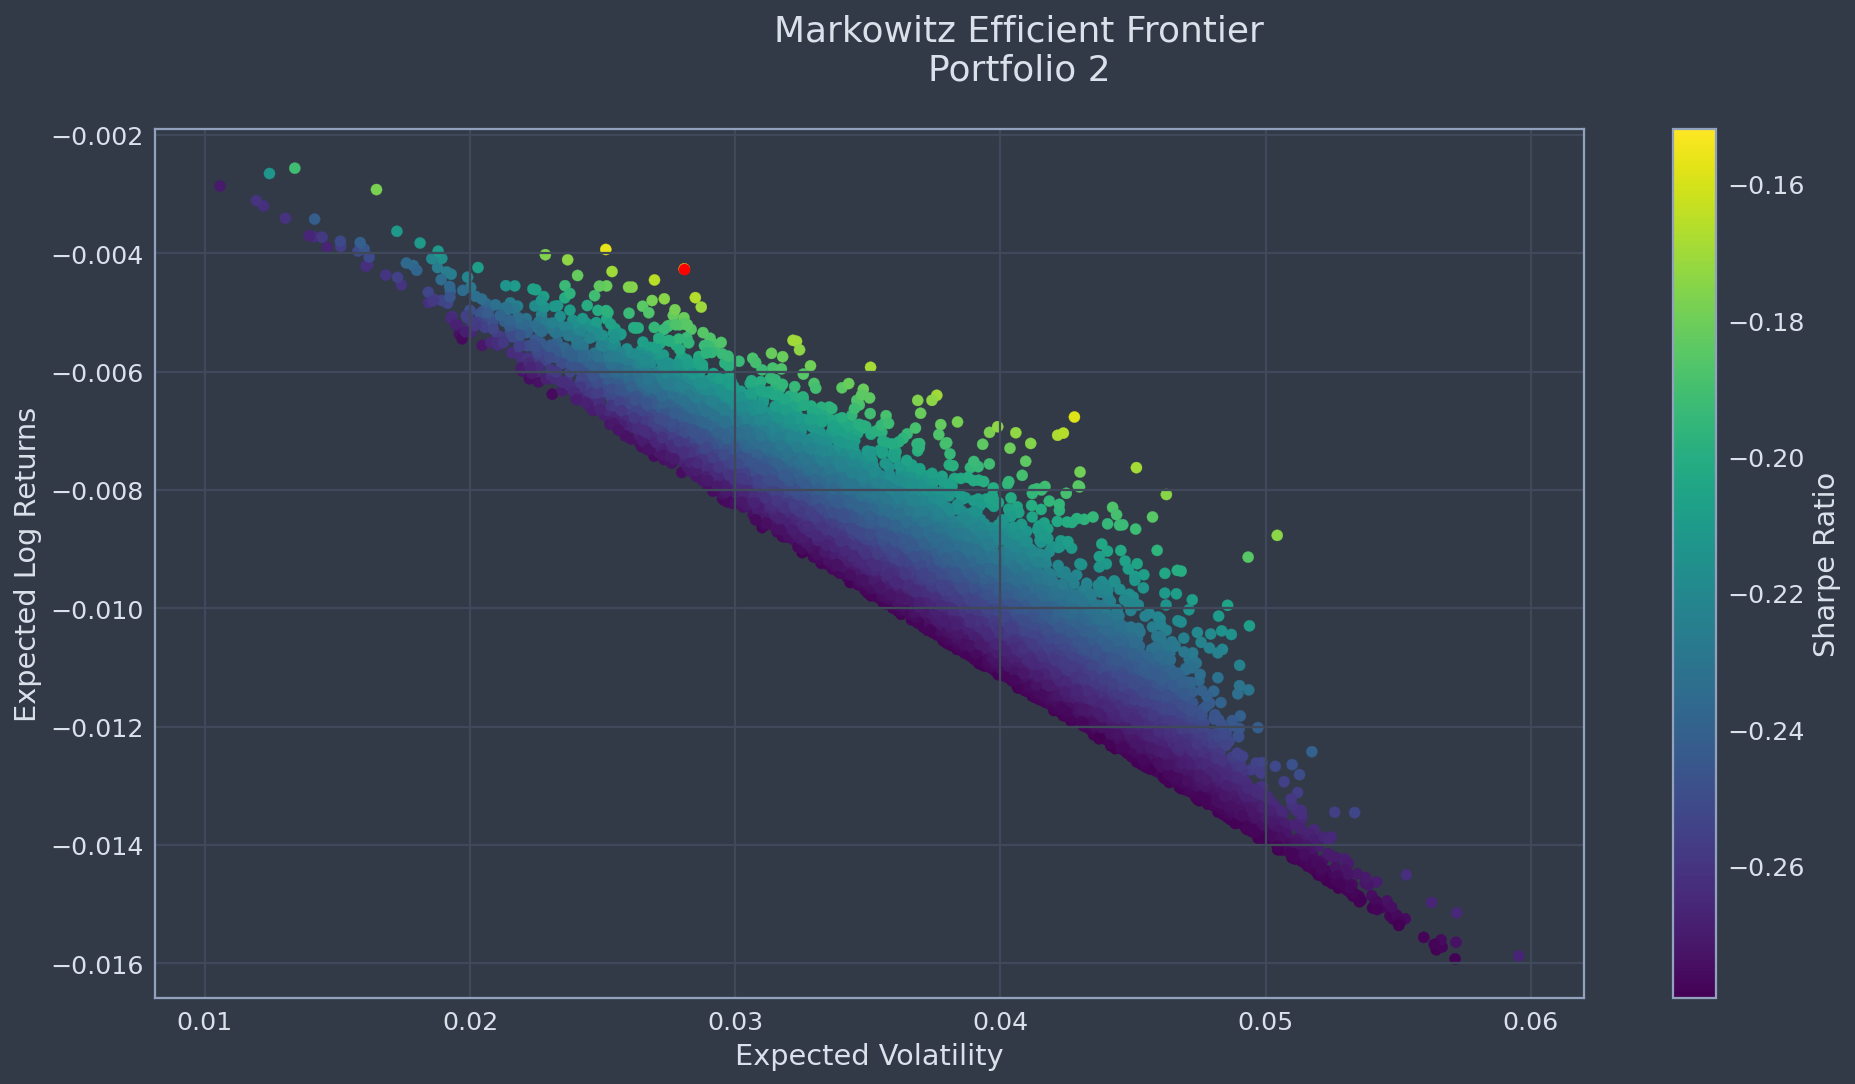

In [ ]:
### Portfolio 2 optimization
weights[2] = sharpe(2)

![slice1](https://drive.google.com/uc?export=download&id=15ss2sr9Ecl7nNaeSMo7fI7Gkio713cZQ)

In [ ]:
###  Plot optimal compostitions of portfolios
from random import shuffle
colors = plt.cm.Set2.colors
def plot_composition(portfolio):
    fig, ax = plt.subplots(figsize=(7,7))
#     ex = np.argmax(weights[portfolio])
#     explode = np.zeros(5)
#     explode[ex] = 0.0
    explode = np.ones(5)*0.0
    ax.pie(weights[portfolio], colors=colors, explode=explode, labels=pl[portfolio], autopct='%1.1f%%',
            pctdistance=0.65,shadow=False, startangle=90) 
    #draw circle
    centre_circle = plt.Circle((0,0),0.80, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.tight_layout()
    ax.axis('equal') 
    plt.suptitle(f"Portfolio {portfolio}", y =1.05, fontsize=18)
    plt.show()

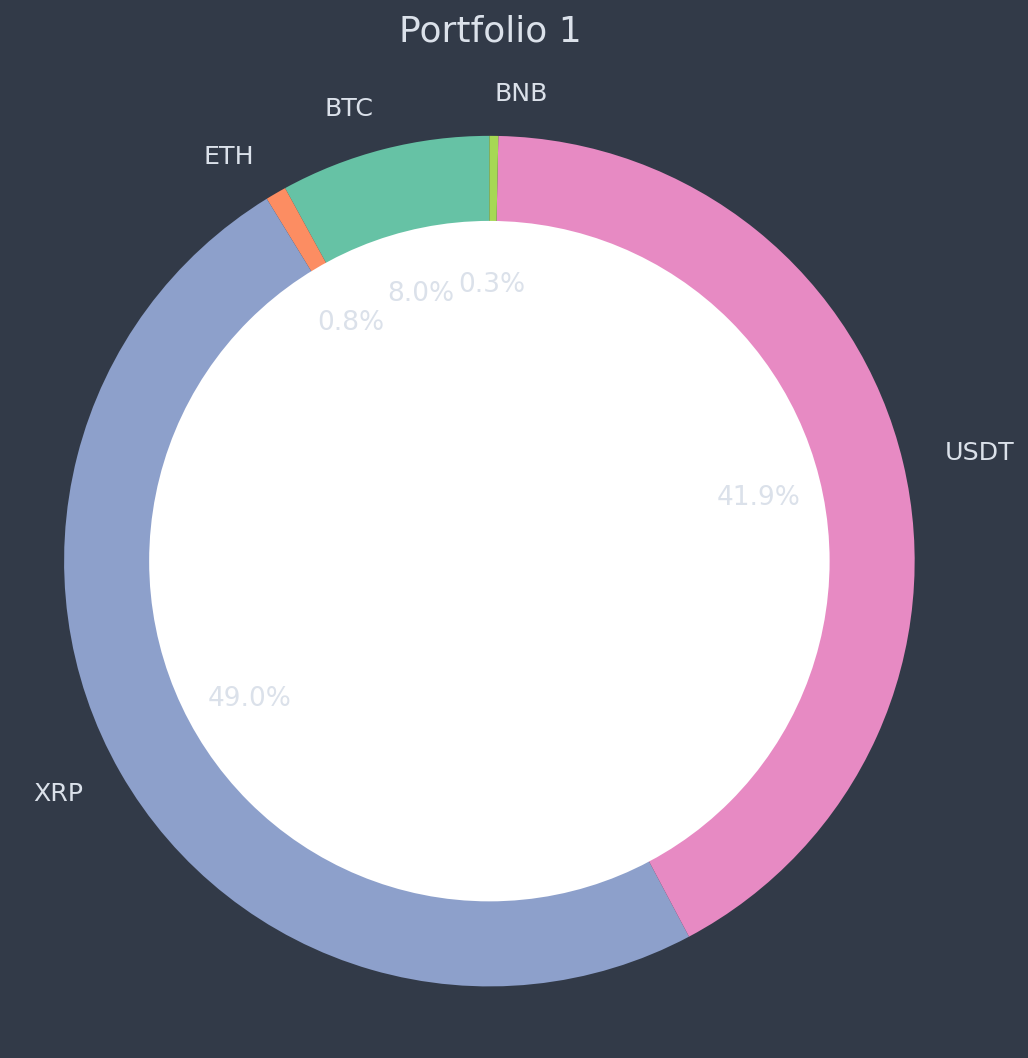

In [ ]:
plot_composition(1)

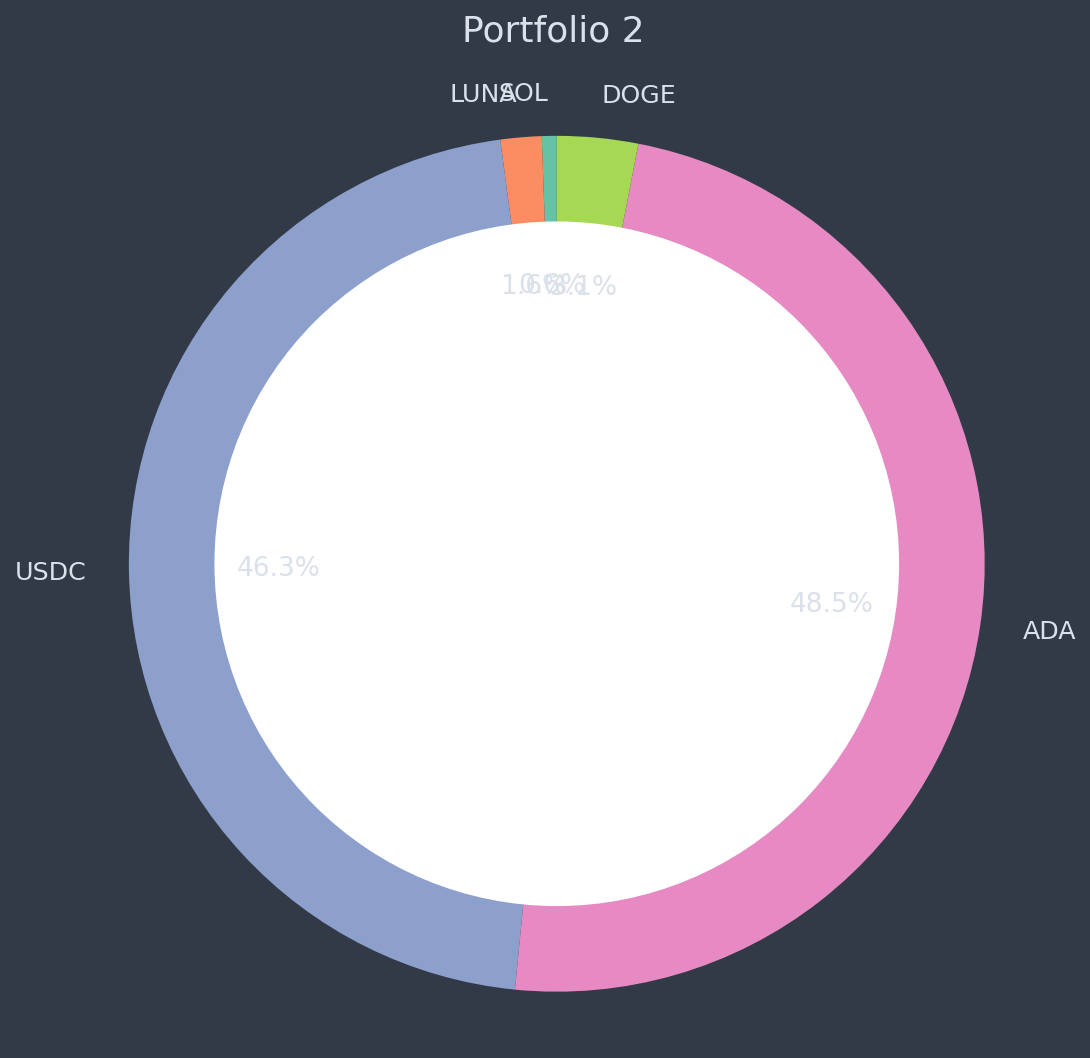

In [ ]:
plot_composition(2)

![slice2](https://drive.google.com/uc?export=download&id=1Bapr76q9lODV4LnZ3WEbHH_TO0_udMaC)

### Observations
The alternative portfolio failed to beat top 5 CCs. With most CCs falling during the period, we observe dismal returns for both portfolios. Portfolio 2 has small negative returns in all simulations and can not best Portfolio 1 in terms of Sharpe ratio, though it has slightly lower risk. 